# pandas fundamentals exercises
Date: 18/10/2021

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**. Please check the [Questions][link]

[link]: https://github.com/kokchun/Databehandling-21/blob/main/Exercises/E00_pandas_basic_syntax.ipynb

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [69]:
import pandas as pd
import numpy as np

df_1 = pd.DataFrame({"Kommun":["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Population":[347949, 975551, 233839, 583056]})
df_1.head(5)

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [71]:
## print cities:
print(df_1["Kommun"])

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object


In [72]:
print(df_1["Kommun"]=="Göteborg")

0    False
1    False
2    False
3     True
Name: Kommun, dtype: bool


In [73]:
print(df_1[df_1["Kommun"]=="Göteborg"])

     Kommun  Population
3  Göteborg      583056


In [74]:
#c Population from largest to smallest
population_sort = df_1.sort_values(by="Population", ascending=False)
print(population_sort)

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839


In [75]:
print(population_sort.head(3))

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949


In [76]:
df_1["Population"]/100

0    3479.49
1    9755.51
2    2338.39
3    5830.56
Name: Population, dtype: float64

In [77]:
sweden_population = 10379295
df_1["Pop %"] = df_1["Population"]/sweden_population*100
#df = pd.DataFrame({"Kommun":series, "Population":population, "Pop_per_%": population_per})
df_1["Pop %"]=df_1["Pop %"].round(2)
df_1

,Kommun,Population,Pop %
0,Malmö,347949,3.35
1,Stockholm,975551,9.40
2,Uppsala,233839,2.25
3,Göteborg,583056,5.62


---

## 2. Cities in Sweden - real dataset (*)

Go into [this page][scb_pop50], scroll down and download the Excel file containing Swedish population dataset from SCB.

[scb_pop50]: https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/topplistor-kommuner/folkmangd-topp-50/

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


In [171]:
import pandas as pd
import numpy as np
path = "../Data/komtopp50_2020.xlsx"
df2 = pd.read_excel(path, sheet_name="Totalt")
df2.shape
df2.info()
df2.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    object 
 1   Unnamed: 1  291 non-null    float64
 2   Unnamed: 2  291 non-null    object 
 3   Unnamed: 3  292 non-null    object 
 4   Unnamed: 4  291 non-null    float64
 5   Unnamed: 5  292 non-null    object 
dtypes: float64(2), object(4)
memory usage: 14.0+ KB


,Unnamed: 1,Unnamed: 4
count,291.000000,291.000000
mean,151.934708,35496.934708
std,138.092769,74190.464321
min,1.000000,2019.000000
25%,73.500000,10005.000000
50%,146.000000,15940.000000
75%,218.500000,35649.500000
max,2019.000000,974073.000000


In [172]:
df2.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring
5,2020,2019.0,NaN,2020,2019.0,%
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401
8,123,123.0,Alvesta,20224,20134.0,0.447005
9,255,255.0,Aneby,6821,6848.0,-0.394276


In [173]:
df2 = df2.iloc[6:]
df2.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401
8,123,123.0,Alvesta,20224,20134.0,0.447005
9,255,255.0,Aneby,6821,6848.0,-0.394276
10,169,167.0,Arboga,14039,14087.0,-0.34074


In [174]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [175]:
df2 = df2.rename({"Unnamed: 0": "Rang 2020","Unnamed: 1": "Rang 2019", "Unnamed: 2": "Kommun", "Unnamed: 3": "Folkmängd 2020", "Unnamed: 4": "Folkmängd 2019", "Unnamed: 5": "Förändring"}, axis="columns")
df2.head(5)

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401
8,123,123.0,Alvesta,20224,20134.0,0.447005
9,255,255.0,Aneby,6821,6848.0,-0.394276
10,169,167.0,Arboga,14039,14087.0,-0.34074


In [176]:
df2 = df2.reset_index(drop=True)
df2.head(5)


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074


In [177]:
df2["Rang 2019"]=df2["Rang 2019"].astype(int)
df2["Folkmängd 2019"]=df2["Folkmängd 2019"].astype(int)
df2.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.34074


In [178]:
cities_top5 = df2.sort_values(by="Folkmängd 2020", ascending=False).head()
cities_top5

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.65167
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822


In [179]:
cities_bottom5 = df2.sort_values(by="Folkmängd 2020", ascending=False).tail()
cities_bottom5

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309
12,290,290,Bjurholm,2387,2408,-0.872093


In [180]:
sum_2020 = np.sum(df2["Folkmängd 2020"])
print(f"Sweden's population in 2020 is: {sum_2020:.0f}")

sum_2019 = np.sum(df2["Folkmängd 2019"])
print(f"Sweden's population in 2019 is: {sum_2019:.0f}")

Sweden's population in 2020 is: 10379295
Sweden's population in 2019 is: 10327589


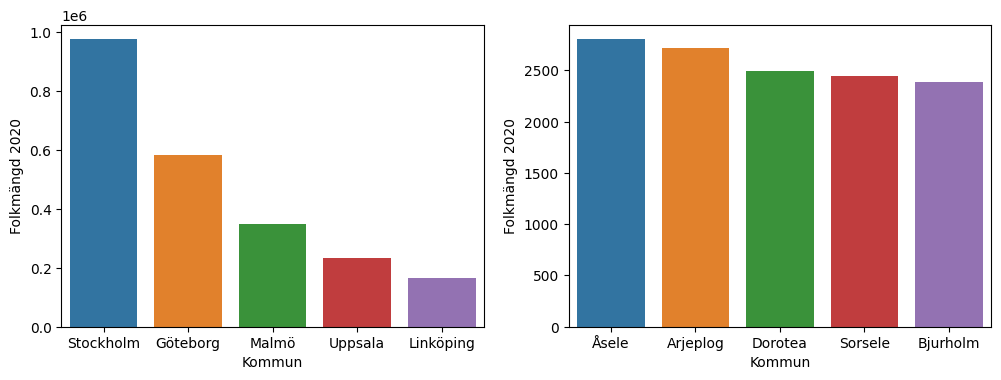

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,2, dpi=100, figsize=(12,4))
sns.barplot(data=cities_top5, x="Kommun", y="Folkmängd 2020", ax=ax[0]);
sns.barplot(data=cities_bottom5, x="Kommun", y="Folkmängd 2020", ax=ax[1]);

---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


In [182]:
def get_data_from_excel(path, my_sheet_name=None):
    df = pd.read_excel(path, sheet_name=my_sheet_name)
    df = df.iloc[6:]
    df = df.rename({"Unnamed: 0": "Rang 2020","Unnamed: 1": "Rang 2019", "Unnamed: 2": "Kommun", "Unnamed: 3": "Folkmängd 2020", "Unnamed: 4": "Folkmängd 2019", "Unnamed: 5": "Förändring"}, axis="columns")
    df = df.reset_index(drop=True)
    df["Rang 2019"] = df["Rang 2019"].astype(int)
    df["Folkmängd 2019"] = df["Folkmängd 2019"].astype(int)
    return df


In [183]:
path = "../Data/komtopp50_2020.xlsx"
df_kvinnor = get_data_from_excel(path, "Kvinnor")
df_kvinnor.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,84,85,Ale,15612,15348,1.720094
1,64,64,Alingsås,20900,20774,0.606527
2,123,123,Alvesta,9857,9795,0.632976
3,255,255,Aneby,3318,3350,-0.955224
4,165,164,Arboga,6945,6973,-0.401549


In [184]:
df_man = get_data_from_excel(path, "Män")
df_man.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,81,83,Ale,16256,16054,1.258253
1,64,64,Alingsås,20702,20646,0.271239
2,122,123,Alvesta,10367,10339,0.270819
3,255,255,Aneby,3503,3498,0.142939
4,169,168,Arboga,7094,7114,-0.281136


In [185]:
df_kvinnor = df_kvinnor.assign(Kön = lambda x: "Kvinnor")  # add new columnn to the end of a DataFrame
df_man = df_man.assign(Kön = lambda x: "Män")
df_total = df_kvinnor.append(df_man)
df_total.info()
df_total.set_index("Kommun")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 289
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rang 2020       580 non-null    object
 1   Rang 2019       580 non-null    int32 
 2   Kommun          580 non-null    object
 3   Folkmängd 2020  580 non-null    object
 4   Folkmängd 2019  580 non-null    int32 
 5   Förändring      580 non-null    object
 6   Kön             580 non-null    object
dtypes: int32(2), object(5)
memory usage: 31.7+ KB


,Rang 2020,Rang 2019,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,,,
Ale,84,85,15612,15348,1.720094,Kvinnor
Alingsås,64,64,20900,20774,0.606527,Kvinnor
Alvesta,123,123,9857,9795,0.632976,Kvinnor
Aneby,255,255,3318,3350,-0.955224,Kvinnor
Arboga,165,164,6945,6973,-0.401549,Kvinnor
...,...,...,...,...,...,...
Österåker,52,55,23647,23132,2.226353,Män
Östhammar,115,115,11405,11447,-0.366908,Män
Östra Göinge,158,156,7747,7745,0.025823,Män


In [186]:
df2.head()
df2 = df2.rename({"Folkmängd 2020": "Total Pop 2020", "Folkmängd 2019": "Total Pop 2019", "Förändring": "Total förändring"}, axis="columns")
df2 = df2.drop(["Rang 2020", "Rang 2019"], axis=1)
df2.head()

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.34074


In [187]:
df_total = df_total.drop(["Rang 2020", "Rang 2019"], axis=1)
df_total.head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,15612,15348,1.720094,Kvinnor
1,Alingsås,20900,20774,0.606527,Kvinnor
2,Alvesta,9857,9795,0.632976,Kvinnor
3,Aneby,3318,3350,-0.955224,Kvinnor
4,Arboga,6945,6973,-0.401549,Kvinnor


In [198]:
df_merge = pd.merge(df_total, df2, how="outer", on=["Kommun"])
df_merge = df_merge.sort_values(by=["Total Pop 2020", "Folkmängd 2020"], ascending=False)
df_merge = df_merge.reset_index(drop=True)
df_merge.head()

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
0,Stockholm,492569,491853,0.145572,Kvinnor,975551,974073,0.151734
1,Stockholm,482982,482220,0.158019,Män,975551,974073,0.151734
2,Göteborg,292505,290308,0.756782,Män,583056,579281,0.65167
3,Göteborg,290551,288973,0.546072,Kvinnor,583056,579281,0.65167
4,Malmö,175411,173543,1.07639,Kvinnor,347949,344166,1.099179


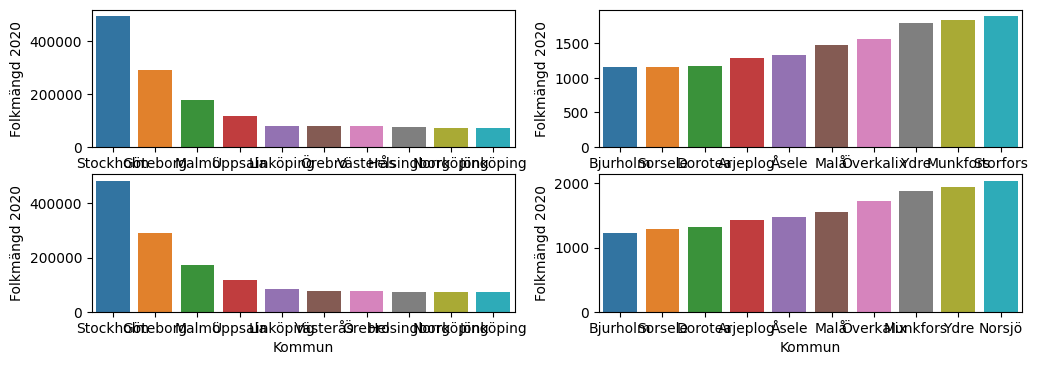

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2,2, dpi=100, figsize=(12,4))
kvinnor_top10 = df_kvinnor.sort_values(by="Folkmängd 2020", ascending = False).head(10)
kvinnor_bottom10 = df_kvinnor.sort_values(by="Folkmängd 2020", ascending = True).head(10)
man_top10 = df_man.sort_values(by="Folkmängd 2020", ascending = False).head(10)
man_bottom10 = df_man.sort_values(by="Folkmängd 2020", ascending = True).head(10)
sns.barplot(data=kvinnor_top10, x="Kommun", y="Folkmängd 2020", ax=ax[0,0]);
sns.barplot(data=kvinnor_bottom10, x="Kommun", y="Folkmängd 2020", ax=ax[0,1]);
sns.barplot(data=man_top10, x="Kommun", y="Folkmängd 2020", ax=ax[1,0]);
sns.barplot(data=man_bottom10, x="Kommun", y="Folkmängd 2020", ax=ax[1,1]);

In [206]:
# total female population in Sweden 2020
sum_kvinnor_2020 = df_kvinnor["Folkmängd 2020"].sum()
print(f"total female population in Sweden 2020: {sum_kvinnor_2020}")
# total male population in Sweden 2020
sum_man_2020 = df_man["Folkmängd 2020"].sum()
print(f"total male population in Sweden 2020: {sum_man_2020}")


total female population in Sweden 2020: 5156448
total male population in Sweden 2020: 5222847


## f

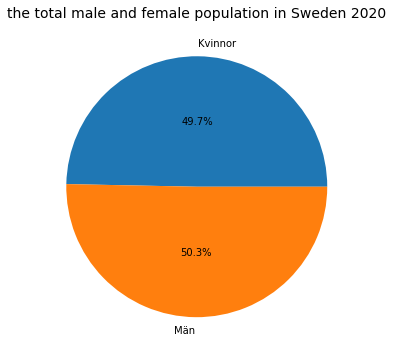

In [210]:
data = df_merge.groupby("Kön")["Folkmängd 2020"].sum()
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("the total male and female population in Sweden 2020", fontsize=14);